[85908.9166026, 28439.00380173333, 19184.7061434, 30684.508762200003, 585356.16, 172349.64266666668, 25984.600698, 23329.467178799998, 81184.19213333334, 37479.657141, 41265.683034333335, 68644.3848, 31076.027664600002, 46618.6199304, 26867.622421, 14997.626852000001, 28203.331570799997, 91155.30105360001, 34063.597968, 13700.278218, 43305.678372, 160741.73629333335, 36886.83656333334, 168222.191268, 118662.12768, 144961.9222, 100261.4452974, 32485.548160000002, 28868.786999999997, 30039.90487666667, 34973.552915, 106674.5137302, 77327.3426388]
[54962.4510948, 29040.174291066665, 19852.6474512, 32708.886661, 585356.16, 172003.448, 25553.876261999998, 22532.5169034, 79553.91645333334, 36831.922006, 39046.21544933334, 68644.32479999999, 31303.8042518, 45327.800621999995, 24792.809800000003, 14020.651187000001, 29226.870854999997, 47139.2902902, 30861.842759999996, 13234.3529676, 41997.117285, 158197.52832, 36915.142993333335, 168206.95331066666, 114674.83829333335, 140556.747, 83365.7752

<>:32: SyntaxWarning: invalid escape sequence '\w'
<>:35: SyntaxWarning: invalid escape sequence '\w'
<>:46: SyntaxWarning: invalid escape sequence '\w'
<>:56: SyntaxWarning: invalid escape sequence '\w'
<>:32: SyntaxWarning: invalid escape sequence '\w'
<>:35: SyntaxWarning: invalid escape sequence '\w'
<>:46: SyntaxWarning: invalid escape sequence '\w'
<>:56: SyntaxWarning: invalid escape sequence '\w'
/var/folders/k3/15fhq19n0jd_hb5cbhxvzf680000gn/T/ipykernel_8247/1047309995.py:32: SyntaxWarning: invalid escape sequence '\w'
  sql_name = re.search('(?<=Query: /Users/mariapogorelova/prev_res/ENGR489-Project/TestQueries/)\w+', line)
/var/folders/k3/15fhq19n0jd_hb5cbhxvzf680000gn/T/ipykernel_8247/1047309995.py:35: SyntaxWarning: invalid escape sequence '\w'
  m = re.search('(?<=Cost: )\w+.\w+', line)
/var/folders/k3/15fhq19n0jd_hb5cbhxvzf680000gn/T/ipykernel_8247/1047309995.py:46: SyntaxWarning: invalid escape sequence '\w'
  m = re.search('(?<=Cost: )\w+.\w+', line)
/var/folders/k3/15

<Axes: ylabel='Cost, log'>

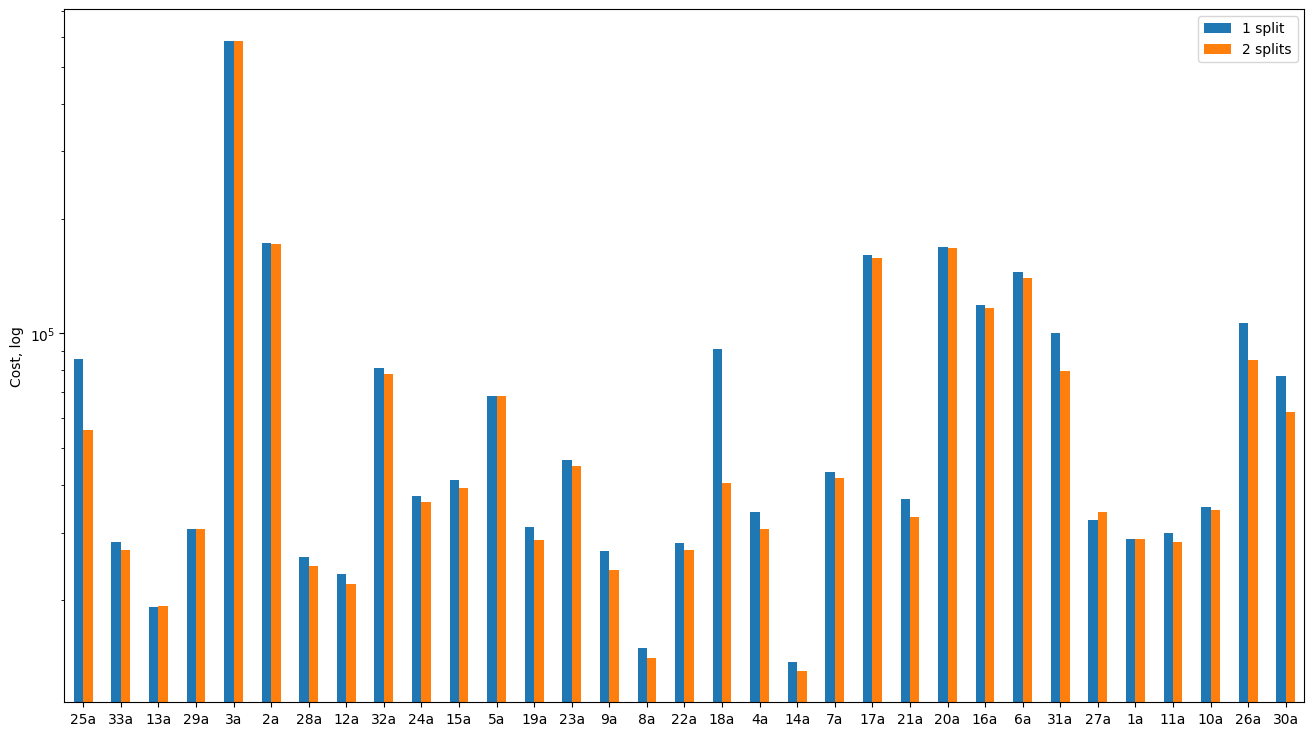

In [272]:
import re, statistics
import pandas as pd

path_to_2splits='/Users/mariapogorelova/Desktop/output_2splits.txt'
path_to_1splits='/Users/mariapogorelova/Desktop/output_1splits.txt'
path_to_crossover='/Users/mariapogorelova/Desktop/output_new_crossover_rate.txt'

def split_list(lst, chunk_size):
    return [lst[i:i + chunk_size] for i in range(0, len(lst), chunk_size)]

def mean_list(chunks):
    mean_list=[]
    for ch in chunks:
        mean_list.append(statistics.mean(ch))
    return mean_list
    
n=30

sql_queries=[]

data_2splits=[]
mean_list_2splits=[]

data_1splits=[]
mean_list_1splits=[]

data_cross=[]
mean_cross=[]

with open(path_to_2splits, 'r') as f:
    for line in f:
        sql_name = re.search('(?<=Query: /Users/mariapogorelova/prev_res/ENGR489-Project/TestQueries/)\w+', line)
        if sql_name is not None:
            sql_queries.append(sql_name.group(0))
        m = re.search('(?<=Cost: )\w+.\w+', line)
        if m is not None:
            data_2splits.append(float(m.group(0)))
            
chunks = split_list(data_2splits, n)

means = mean_list(chunks)
mean_list_2splits=means.copy()

with open(path_to_1splits, 'r') as f:
    for line in f:
        m = re.search('(?<=Cost: )\w+.\w+', line)
        if m is not None:
            data_1splits.append(float(m.group(0)))

chunks = split_list(data_1splits, n)
means = mean_list(chunks)
mean_list_1splits=means.copy()

with open(path_to_crossover, 'r') as f:
    for line in f:
        m = re.search('(?<=Cost: )\w+.\w+', line)
        if m is not None:
            data_cross.append(float(m.group(0)))

chunks = split_list(data_cross, n)
means = mean_list(chunks)
mean_cross=means.copy()


print(mean_list_1splits)
print(mean_list_2splits)
print(mean_cross)


df = pd.DataFrame({'1 split': mean_list_1splits, '2 splits': mean_cross}, index= sql_queries)
df.plot(kind='bar', figsize=(16,9), logy=True, ylabel='Cost, log',rot=0)







In [55]:
import math

def standard_deviation(chunks):
    ch_num=0
    stdev_list=[]
    for ch in chunks:
        acc=0
        for c in ch:
            acc+=pow(c-mean_list_2splits[ch_num],2)
        acc/=n
        stdev=math.sqrt(acc)
        ch_num+=1
        stdev_list.append(stdev)
    return stdev_list

chunks = split_list(data_2splits, n)
list_stdev = standard_deviation(chunks)
print(list_stdev)
print(mean_list_2splits)

def variance_coef(stdev, mean):
    coef_list=[]
    for i in range(n-1):
        coef_list.append((stdev[i]/mean[i])*100)
    return coef_list

coef = variance_coef(list_stdev, mean_list_2splits)
print(coef)

chunks = split_list(data_1splits, n)
list_stdev_baseline = standard_deviation(chunks)
coef = variance_coef(list_stdev_baseline, mean_list_1splits)
print(coef)


[21852.82508109203, 6353.375676620127, 1557.2634242371366, 8858.729781222635, 0.0, 0.0, 2806.851902392292, 1475.8484023661304, 5062.450996193313, 7558.332554702133, 5872.305524725, 0.3641505732522664, 6350.284347041636, 2780.8851685828276, 3874.0909959681076, 1084.5214232612884, 6116.614550677256, 16758.569057584675, 719.3492379040663, 1403.9384413664222, 7540.6702056847, 1768.031196331821, 4672.733937606828, 1993.8659998449762, 4984.981243446406, 2557.754357656388, 24287.841980736797, 5833.52123194078, 0.028800000000046556, 3813.3607338292, 642.7619328123108, 22774.84905442308, 23704.415493208642]
[54962.4510948, 29040.174291066665, 19852.6474512, 32708.886661, 585356.16, 172003.448, 25553.876261999998, 22532.5169034, 79553.91645333334, 36831.922006, 39046.21544933334, 68644.32479999999, 31303.8042518, 45327.800621999995, 24792.809800000003, 14020.651187000001, 29226.870854999997, 47139.2902902, 30861.842759999996, 13234.3529676, 41997.117285, 158197.52832, 36915.142993333335, 168206.

In [84]:
def find_extreme_outliers(data, mean, stdev):
    outliers_list=[]
    i=0
    for da in data:
        for d in da:
            z=0
            if stdev[i]!=0:
                z=(d-mean[i])/stdev[i]
            if z>3:
                appndx = [sql_queries[i], d, z]
                outliers_list.append(appndx)
        i+=1
    return outliers_list

chunks = split_list(data_2splits, n)
list_stdev = standard_deviation(chunks)
outlist_2_splits = find_extreme_outliers(chunks, mean_list_2splits, list_stdev)

chunks = split_list(data_1splits, n)
list_stdev = standard_deviation(chunks)
outlist_1_splits = find_extreme_outliers(chunks, mean_list_1splits, list_stdev)

def delete_extreme_outliers(chunks, outlist):
    for o in outlist:
        i=sql_queries.index(o[0])
        i1=chunks[i].index(o[1])
        median = statistics.median(chunks[i])
        chunks[i].pop(i1)
        chunks[i].insert(i1,median)
        
chunks = split_list(data_2splits, n)
delete_extreme_outliers(chunks, outlist_2_splits)
cleared_chunks_2splits = chunks.copy()

chunks = split_list(data_1splits, n)
delete_extreme_outliers(chunks, outlist_1_splits)
cleared_chunks_1splits = chunks.copy()

In [102]:
def standard_deviation(val, mean):
    acc=0
    for v in val:
        acc+=pow(v-mean,2)
    acc/=33-1
    stdev=math.sqrt(acc)
    return stdev

def p_test(base_method, my_method):
    differences_list = []
    for s in sql_queries:
        i=sql_queries.index(s)
        base_query = base_method[i]
        my_query = my_method[i]
        base_mean = statistics.mean(base_query)
        my_mean = statistics.mean(my_query)
        difference = base_mean - my_mean
        differences_list.append(difference)
        print(s, base_mean, my_mean, difference)
    differences_mean = statistics.mean(differences_list)
    print(differences_mean)
    differences_stdev = standard_deviation(differences_list, differences_mean)
    print(differences_stdev)
    SE = differences_stdev/math.sqrt(33)
    print(SE)
    t = differences_mean/SE
    print(t)


p_test(cleared_chunks_1splits, cleared_chunks_2splits)

25a 85908.9166026 54962.4510948 30946.4655078
33a 28439.00380173333 29040.174291066665 -601.1704893333335
13a 19054.9100106 19852.6474512 -797.7374405999981
29a 30684.508762200003 32708.886661 -2024.3778987999976
3a 585356.16 585356.16 0.0
2a 172003.448 172003.448 0.0
28a 25984.600698 25231.8793872 752.7213107999996
12a 23021.3599188 22314.8227686 706.5371502000016
32a 81184.19213333334 78658.08752000002 2526.1046133333293
24a 37479.657141 36831.922006 647.7351350000026
15a 41265.683034333335 39046.21544933334 2219.4675849999985
5a 68644.3194 68644.257 0.062399999995250255
19a 31076.027664600002 31303.8042518 -227.77658719999818
23a 46132.866288 45033.664278 1099.2020100000009
9a 26867.622421 24792.809800000003 2074.8126209999973
8a 14997.626852000001 14020.651187000001 976.9756649999999
22a 28203.331570799997 29226.870854999997 -1023.5392842000001
18a 91155.30105360001 45051.649534799995 46103.65151880001
4a 34063.597968 30728.262959999996 3335.3350080000055
14a 13700.278218 12992.102

In [150]:
def standard_deviation(val, mean):
    acc=0
    for v in val:
        acc+=pow(v-mean,2)
    acc/=30-1
    stdev=math.sqrt(acc)
    return stdev

def p_test(base_method, my_method):
    t_list = []
    for s in sql_queries:
        i=sql_queries.index(s)
        base_query = base_method[i]
        my_query = my_method[i]
        differences = [a - b for a, b in zip(base_query, my_query)]
        print(s)
        differences_mean = statistics.mean(differences)
        print(differences_mean)
        differences_stdev = standard_deviation(differences, differences_mean)
        print(differences_stdev)
        SE = differences_stdev/math.sqrt(30)
        print(SE)
        if SE !=0:
            t = differences_mean/SE
        else:
            t = 0
        print(t)
        t_list.append(t)

chunks_1split = split_list(data_1splits, n)
chunks_cross = split_list(data_cross, n)
p_test(chunks_1split, chunks_cross)

25a
29952.8846238
20342.213958844986
3713.963151618622
8.064938557816847
33a
1476.2610653333327
6675.229499330995
1218.7245911025007
1.2113163844489718
13a
-141.34855259999944
1777.781268033818
324.57696760408663
-0.43548546787957537
29a
-32.5613644000007
10093.301271476928
1842.7762620278293
-0.017669732930122237
3a
0.0
0.0
0.0
0
2a
346.19466666666654
1896.1862822131507
346.19466666666654
1.0
28a
1411.6636500000002
3688.3549763157653
673.3984068715258
2.096327576060518
12a
1342.0400874
1974.4139809752135
360.4770250779001
3.7229559556811735
32a
2714.9714933333325
9020.160697835534
1646.8484955086874
1.6485860725729464
24a
1334.748051800001
14199.495783486385
2592.4613819383285
0.5148574482533036
15a
1961.6570776666672
7314.112936563985
1335.3682144988156
1.4690008765881157
5a
0.1254000000000815
0.3615015238198612
0.06600084638954304
1.899975634554127
19a
2367.1167072000003
8287.107690584016
1513.0119395358026
1.5645062972379715
23a
1647.865566599998
4416.262648228317
806.2955574340505

In [151]:
def mean_and_st_dev(base_method, my_method):
    for s in sql_queries:
        i=sql_queries.index(s)
        base_query = base_method[i]
        my_query = my_method[i]
        base_mean = statistics.mean(base_query)
        base_stdev = standard_deviation(base_query, base_mean)
        my_mean = statistics.mean(my_query)
        my_stdev = standard_deviation(my_query, my_mean)
        print(s, base_mean, base_stdev, my_mean, my_stdev)


mean_and_st_dev(chunks_1split, chunks_cross)
        

25a 85908.9166026 2464.536698554213 55956.0319788 20327.45606191039
33a 28439.00380173333 4922.2265584810975 26962.7427364 5048.035462964854
13a 19184.7061434 938.6677646848875 19326.054696 1541.7127283313837
29a 30684.508762200003 6901.8435618545045 30717.070126600003 5952.729906897769
3a 585356.16 0.0 585356.16 0.0
2a 172349.64266666668 1896.1862822131511 172003.448 0.0
28a 25984.600698 2932.1338929991834 24572.937048 1915.53535762267
12a 23329.467178799998 1819.3903773057027 21987.4270914 699.7105490527775
32a 81184.19213333334 8633.004179995614 78469.22064000001 1728.6407754296968
24a 37479.657141 9475.368854414433 36144.9090892 9414.476434248869
15a 41265.683034333335 5362.033370889375 39304.02595666667 5269.530460385037
5a 68644.3848 0.3582105526082937 68644.2594 0.027291529568884653
19a 31076.027664600002 6590.945468559318 28708.9109574 5725.50658848756
23a 46618.6199304 3441.5401258744846 44970.7543638 2275.3764592235807
9a 26867.622421 4330.774374763138 23901.877613 2521.34275

In [253]:
import regex as re

path_to_c='/Users/mariapogorelova/Desktop/test_conv.txt'
raw_conv=[]
sql_queries=[]

with open(path_to_c, 'r') as f:
    for line in f:
        sql_name = re.search('(?<=Query: /Users/mariapogorelova/prev_res/ENGR489-Project/TestQueries/)\w+', line)
        if sql_name is not None:
            sql_queries.append(sql_name.group(0))
        m = re.search('(?<=Convergence curve: )\s*\[.*?\]', line)
        if m is not None:
            raw_conv.append(m.group(0))


def conv_conv(raw_data,n):
    numeric_data=[]
    for i in range(n):
        float_list=[]
        r=raw_data[i].replace("[","")
        r=r.replace("]","")
        li = r.split(", ")
        for it in li:
            m = it.replace("np.float64(","").replace(")","")
            if m is not None:
                float_list.append(float(m))
        numeric_data.append(float_list)
    list_mean=map(statistics.mean, zip(*numeric_data))
    return list(list_mean)

def unfold_data(sql_queries, raw_data):
    list_of_dicts=[]
    for s in sql_queries:
        mean_list = conv_conv(raw_data, n)
        querydict={s:mean_list}
        raw_data = raw_data[n:]
        list_of_dicts.append(querydict)
    return list_of_dicts



original_dicts = unfold_data(sql_queries, raw_conv)    

<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k3/15fhq19n0jd_hb5cbhxvzf680000gn/T/ipykernel_8247/3524573851.py:9: SyntaxWarning: invalid escape sequence '\w'
  sql_name = re.search('(?<=Query: /Users/mariapogorelova/prev_res/ENGR489-Project/TestQueries/)\w+', line)
/var/folders/k3/15fhq19n0jd_hb5cbhxvzf680000gn/T/ipykernel_8247/3524573851.py:12: SyntaxWarning: invalid escape sequence '\s'
  m = re.search('(?<=Convergence curve: )\s*\[.*?\]', line)


In [254]:
import regex as re

path_to_c='/Users/mariapogorelova/Desktop/test_conv_adaptive_cross.txt'
raw_conv=[]
sql_queries=[]

with open(path_to_c, 'r') as f:
    for line in f:
        sql_name = re.search('(?<=Query: /Users/mariapogorelova/prev_res/ENGR489-Project/TestQueries/)\w+', line)
        if sql_name is not None:
            sql_queries.append(sql_name.group(0))
        m = re.search('(?<=Convergence curve: )\s*\[.*?\]', line)
        if m is not None:
            raw_conv.append(m.group(0))


def conv_conv(raw_data,n):
    numeric_data=[]
    for i in range(n):
        float_list=[]
        r=raw_data[i].replace("[","")
        r=r.replace("]","")
        li = r.split(", ")
        for it in li:
            m = it.replace("np.float64(","").replace(")","")
            if m is not None:
                float_list.append(float(m))
        numeric_data.append(float_list)
    list_mean=map(statistics.mean, zip(*numeric_data))
    return list(list_mean)

def unfold_data(sql_queries, raw_data):
    list_of_dicts_adaptive_crossover=[]
    for s in sql_queries:
        mean_list = conv_conv(raw_data, n)
        querydict={s:mean_list}
        raw_data = raw_data[n:]
        list_of_dicts_adaptive_crossover.append(querydict)
    return list_of_dicts_adaptive_crossover



adaptive_dicts = unfold_data(sql_queries, raw_conv) 
print (adaptive_dicts[0].get("25a"))
print (original_dicts[0].get("25a"))


[119732.15905193334, 101891.00068319999, 92203.89326520001, 80131.2731844, 75733.0150746, 70833.060618, 67755.2435736, 63433.0824504, 60563.768039999995, 58061.297240399996, 55980.1286976, 54112.7824566, 52673.2722534, 52181.4217122, 52046.704818599996, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102, 51113.6862102]
[119323.18988600001, 109233.29057540001, 100570.2313386, 96381.8433126, 95254.0241442, 92892.88763160001, 92311.1990394, 89898.621441, 88755.7405206, 87822.480558, 87273.1383702, 87209.3741862, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313883, 86986.313

<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k3/15fhq19n0jd_hb5cbhxvzf680000gn/T/ipykernel_8247/2644217112.py:9: SyntaxWarning: invalid escape sequence '\w'
  sql_name = re.search('(?<=Query: /Users/mariapogorelova/prev_res/ENGR489-Project/TestQueries/)\w+', line)
/var/folders/k3/15fhq19n0jd_hb5cbhxvzf680000gn/T/ipykernel_8247/2644217112.py:12: SyntaxWarning: invalid escape sequence '\s'
  m = re.search('(?<=Convergence curve: )\s*\[.*?\]', line)


<Axes: title={'center': '25a.sql'}, xlabel='Generations', ylabel='Cost'>

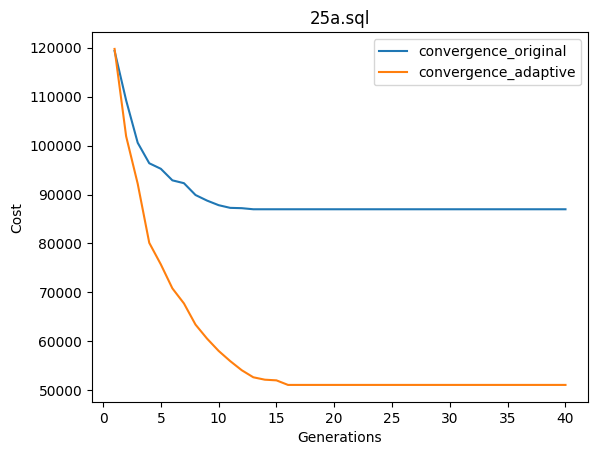

In [256]:
samples = len(adaptive_dicts[0].get("25a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[0].get("25a"), 'convergence_adaptive': adaptive_dicts[0].get("25a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='25a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '28a.sql'}, xlabel='Generations', ylabel='Cost'>

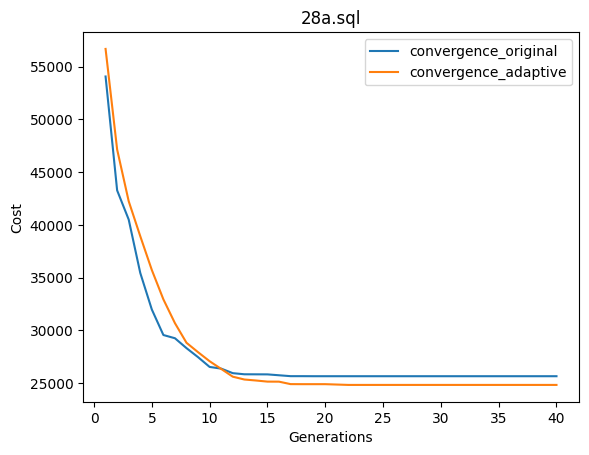

In [259]:
print(sql_queries)
samples = len(adaptive_dicts[1].get("28a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[1].get("28a"), 'convergence_adaptive': adaptive_dicts[1].get("28a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='28a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '12a.sql'}, xlabel='Generations', ylabel='Cost'>

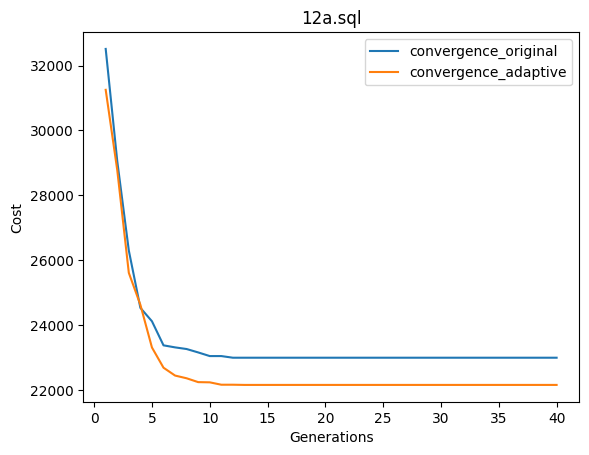

In [261]:
print(sql_queries)
samples = len(adaptive_dicts[2].get("12a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[2].get("12a"), 'convergence_adaptive': adaptive_dicts[2].get("12a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='12a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '5a.sql'}, xlabel='Generations', ylabel='Cost'>

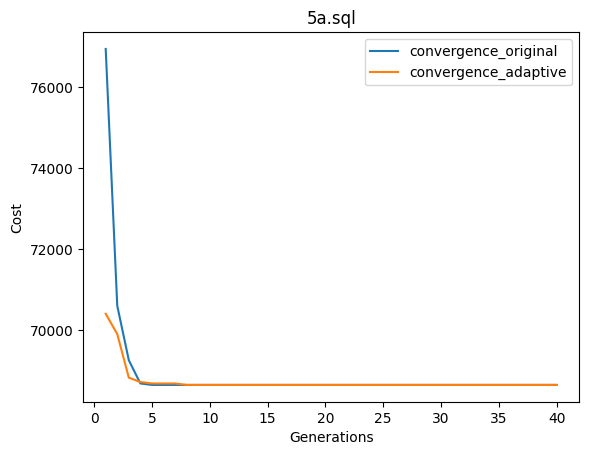

In [264]:
print(sql_queries)
samples = len(adaptive_dicts[3].get("5a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[3].get("5a"), 'convergence_adaptive': adaptive_dicts[3].get("5a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='5a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '12a.sql'}, xlabel='Generations', ylabel='Cost'>

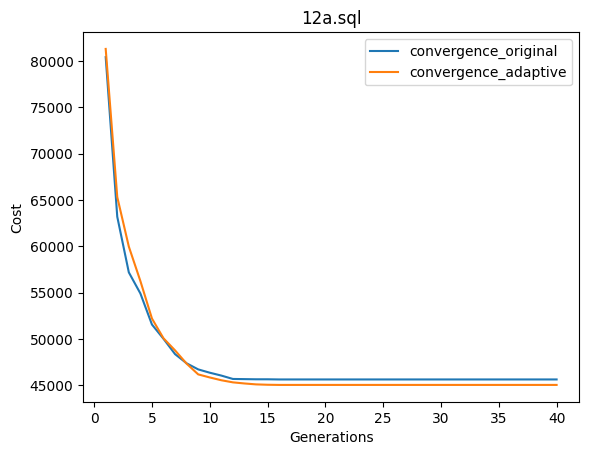

In [263]:
print(sql_queries)
samples = len(adaptive_dicts[4].get("23a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[4].get("23a"), 'convergence_adaptive': adaptive_dicts[4].get("23a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='23a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '9a.sql'}, xlabel='Generations', ylabel='Cost'>

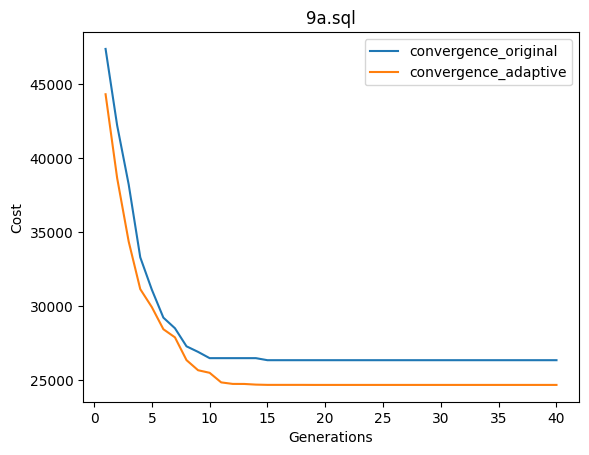

In [265]:
print(sql_queries)
samples = len(adaptive_dicts[5].get("9a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[5].get("9a"), 'convergence_adaptive': adaptive_dicts[5].get("9a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='9a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '18a.sql'}, xlabel='Generations', ylabel='Cost'>

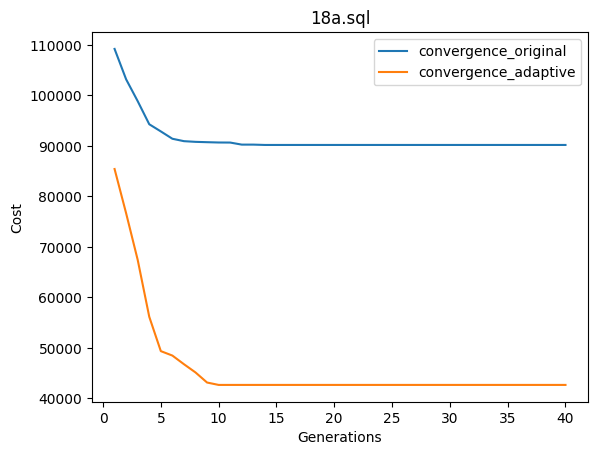

In [266]:
print(sql_queries)
samples = len(adaptive_dicts[6].get("18a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[6].get("18a"), 'convergence_adaptive': adaptive_dicts[6].get("18a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='18a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '14a.sql'}, xlabel='Generations', ylabel='Cost'>

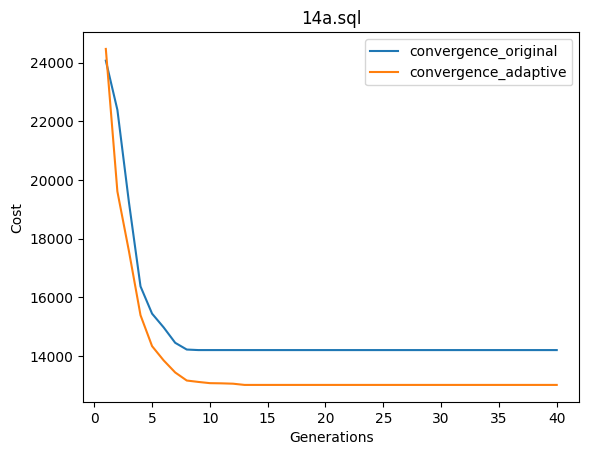

In [267]:
print(sql_queries)
samples = len(adaptive_dicts[7].get("14a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[7].get("14a"), 'convergence_adaptive': adaptive_dicts[7].get("14a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='14a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '4a.sql'}, xlabel='Generations', ylabel='Cost'>

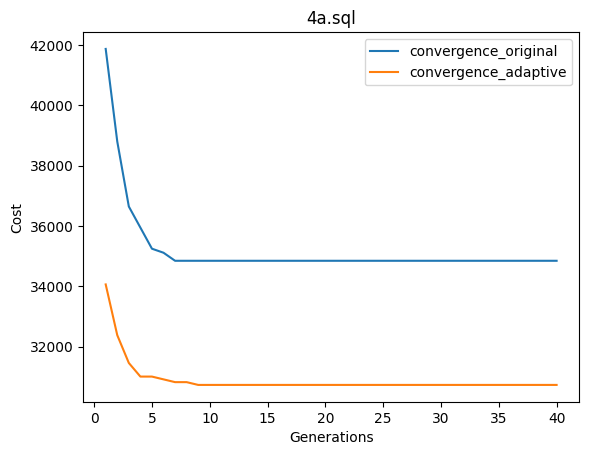

In [268]:
print(sql_queries)
samples = len(adaptive_dicts[8].get("4a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[8].get("4a"), 'convergence_adaptive': adaptive_dicts[8].get("4a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='4a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '17a.sql'}, xlabel='Generations', ylabel='Cost'>

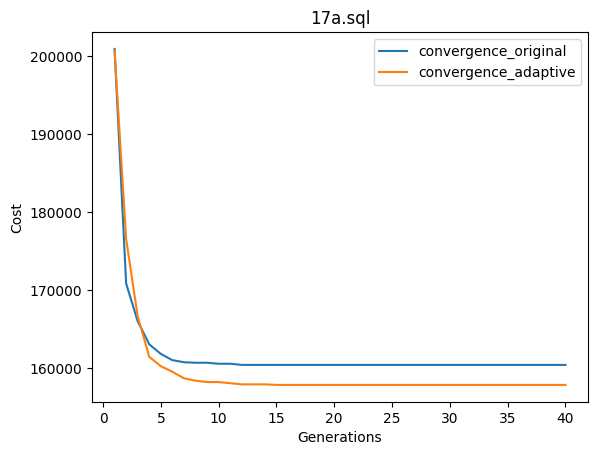

In [269]:
print(sql_queries)
samples = len(adaptive_dicts[9].get("17a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[9].get("17a"), 'convergence_adaptive': adaptive_dicts[9].get("17a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='17a.sql',rot=0)

['25a', '28a', '12a', '5a', '23a', '9a', '18a', '14a', '4a', '17a', '21a']


<Axes: title={'center': '21a.sql'}, xlabel='Generations', ylabel='Cost'>

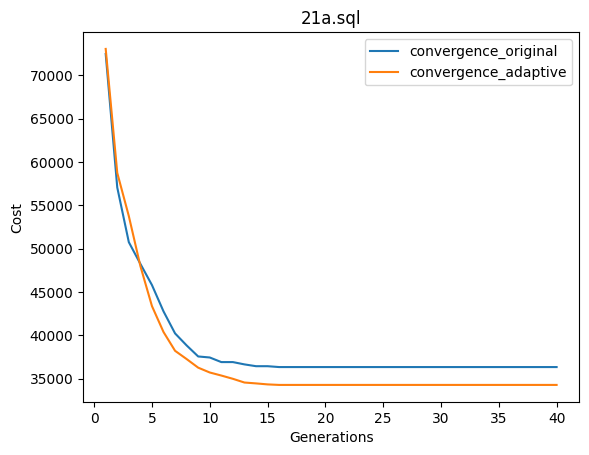

In [270]:
print(sql_queries)
samples = len(adaptive_dicts[10].get("21a"))
indices = list(range(1, samples + 1))


df = pd.DataFrame({'convergence_original': original_dicts[10].get("21a"), 'convergence_adaptive': adaptive_dicts[10].get("21a")}, index= indices)
df.plot(ylabel='Cost',xlabel='Generations',title='21a.sql',rot=0)